In [ ]:
import os
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import random
import numpy as np
#for hpc
#notebook_dir = Path(os.getcwd()) / "AntiBERTa"
notebook_dir = Path(os.getcwd())
os.chdir(notebook_dir)

if str(notebook_dir) not in sys.path:
    sys.path.insert(0, str(notebook_dir))


print("New CWD:", os.getcwd())
print("Files here:", os.listdir())
print("sys.path includes notebook dir:", notebook_dir in map(Path, sys.path))


tok_dir = Path(os.getcwd()) / "tokenizer"
print("Tokenizer folder exists:", tok_dir.exists())
print("Contents:", list(tok_dir.iterdir()) if tok_dir.exists() else "N/A")
#works on hpc
#print("Files in module folder:", os.listdir(notebook_dir))

'''
remember to change kernelspec in HPC file to:
"kernelspec": {
    "display_name": "pytorch_env",
    "language": "python",
    "name": "pytorch_env"
  },

where pytorch_env is the conda environment with the required kernel and modules
'''

New CWD: c:\Users\felip\Documents\Thesis Language Learning\LanguageLearningModelsForAntigenPresentationPrediction\AntiBERTa
Files here: ['antibertaTrainHLAA0201.py', 'clustersAntiberta.ipynb', 'createROCs.ipynb', 'data', 'generatedPeptides', 'generatePeptides.py', 'hyperparamData', 'hyperparametricAnalysis.ipynb', 'hyperparamSearch.py', 'levenshteinDist.ipynb', 'lossAnalysis.py', 'metrics.ipynb', 'models', 'models3', 'modelsPeptideOnly', 'netmhcBenchmark', 'netmhcbenchmark.ipynb', 'quality.py', 'results', 'run5Fold.py', 'runSingleFold.py', 'test', 'tmp_output', 'tokenizer', 'TransmutModel', '__pycache__']
sys.path includes notebook dir: True
Tokenizer folder exists: True
Contents: [WindowsPath('c:/Users/felip/Documents/Thesis Language Learning/LanguageLearningModelsForAntigenPresentationPrediction/AntiBERTa/tokenizer/merges.txt'), WindowsPath('c:/Users/felip/Documents/Thesis Language Learning/LanguageLearningModelsForAntigenPresentationPrediction/AntiBERTa/tokenizer/vocab.json')]


'\nremember to change kernelspec in HPC file to:\n"kernelspec": {\n    "display_name": "pytorch_env",\n    "language": "python",\n    "name": "pytorch_env"\n  },\n\nwhere pytorch_env is the conda environment with the required kernel and modules\n'

In [2]:
hlasSafeName = "HLA_HLA-A_02-01"
hla = "HLA-A*02:01"

In [3]:
from transformers import RobertaTokenizer, RobertaForMaskedLM
import torch
# Load tokenizer and model from correct directories
base = Path.cwd()  # should be /.../AntiBERTa
tok_path = base / "tokenizer"
model_path = base / "modelsPeptideOnly"/ hlasSafeName

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = RobertaTokenizer.from_pretrained(tok_path,local_files_only=True)
model = RobertaForMaskedLM.from_pretrained(model_path, local_files_only=True).to(device)
model.eval()

RobertaForMaskedLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(26, 768, padding_idx=1)
      (position_embeddings): Embedding(152, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-4): 5 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [ ]:
# Settings for plots from Methods for Data Science module at Imperial College London
# we define a mix of fontsizes, for different parts of a plot
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

import seaborn as sns

# example of how you can use these fontsizes to set a global configuration for matplotlib;
# you should assign them based on the specific appearance of the figures you are producing
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#setting seeds
seed = 6
random.seed(seed )
torch.manual_seed(seed )
np.random.seed(seed ) 
colours = ['#9BC995', "#083D77", '#9A031E', '#C4B7CB', '#FC7753']

# Create a seaborn palette from these colors
custom_palette = sns.color_palette(colours )
palette = sns.color_palette(custom_palette, n_colors=15)

In [5]:
import Levenshtein
import pandas as pd 
from collections import Counter
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def min_levenshtein_distances(generated_peptides, real_peptides):
    min_dists = []
    for gen_pep in tqdm(generated_peptides, desc=f"Computing min distances vs {len(real_peptides)} real peptides"):
        dists = [Levenshtein.distance(gen_pep, real_pep) for real_pep in real_peptides]
        min_dists.append(min(dists))
    return min_dists


In [6]:
import csv
from collections import defaultdict

# Initialize the dictionary
lengthToPeptides = defaultdict(list)

# Read the CSV file
with open('generatedPeptides/HLAA0201/generated_peptides.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        length = int(row['length'])
        peptide = row['peptide']
        lengthToPeptides[length].append(peptide)

# Convert defaultdict to regular dict (optional)
lengthToPeptides = dict(lengthToPeptides)

#### Retrieving real peptides

In [7]:
data = pd.read_csv("data/fullData/train_HLA_A0201.csv")

# Extract real peptides for this HLA
peptidesReal = data[data['HLA'] == hla]['peptide'].values  

#### Extract conditional Probabilities of generated peptides

In [8]:
import torch
import torch.nn.functional as F
from tqdm import tqdm
import pandas as pd

plot_data = []

for length in lengthToPeptides.keys():
    peptides_real_filtered = [p for p in peptidesReal if len(p) == length]
    if not peptides_real_filtered:
        continue

    distances = min_levenshtein_distances(lengthToPeptides[length], peptides_real_filtered)

    for pep, dist in tqdm(zip(lengthToPeptides[length], distances), total=len(lengthToPeptides[length]), desc=f"Processing peptides of length {length}"):
        base_input_ids = tokenizer.encode(pep, return_tensors='pt').squeeze(0).to(device)
        peptide_len_with_tokens = base_input_ids.size(0)

        log_probs_list = []
        for i in range(1, peptide_len_with_tokens - 1):
            # Create a new input with only one token masked at position i
            masked_input = base_input_ids.clone()
            masked_input[i] = tokenizer.mask_token_id

            masked_input = masked_input.unsqueeze(0)  # Add batch dimension

            with torch.no_grad():
                output = model(masked_input)
                # The logits for the masked position are at output.logits[0, i]
                logits = output.logits[0, i]

            log_probs = F.log_softmax(logits, dim=-1)

            true_token_id = base_input_ids[i]
            log_prob = log_probs[true_token_id].item()
            log_probs_list.append(log_prob)

        total_log_prob = sum(log_probs_list)
        
        prob = torch.exp(torch.tensor(total_log_prob)).item()

        plot_data.append({
            'HLA': hla,
            'Peptide': pep,
            'Levenshtein Distance': dist,
            'Log-Probability': total_log_prob, 
            'Probability': prob,
            'Length': length
        })

df_plot = pd.DataFrame(plot_data)

Processing peptides of length 23: 100%|██████████| 134/134 [00:34<00:00,  3.94it/s]


In [9]:
from tqdm import tqdm
from collections import defaultdict

real_probs_by_length = defaultdict(list)  

for pep in tqdm(peptidesReal, desc="Computing real peptide probabilities"):
    length = len(pep)
    L = length
    
    input_ids = [tokenizer.cls_token_id] + [tokenizer.mask_token_id] * L + [tokenizer.sep_token_id]
    input_ids = torch.tensor([input_ids], device=device)
    attention_mask = torch.ones_like(input_ids).to(device)

    peptide_token_ids = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(pep))

    log_probs = []

    for pos in range(1, 1 + L):
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits[0, pos]
            probs = F.log_softmax(logits, dim=-1)

            true_token_id = peptide_token_ids[pos - 1]
            log_probs.append(probs[true_token_id].item())

            input_ids[0, pos] = true_token_id

    total_log_prob = sum(log_probs)
    peptide_prob = torch.exp(torch.tensor(total_log_prob, device=device)).item()

    real_probs_by_length[L].append(peptide_prob)

avg_real_prob_by_length = {length: np.mean(probs) for length, probs in real_probs_by_length.items()}

Computing real peptide probabilities: 100%|██████████| 19109/19109 [32:36<00:00,  9.77it/s]


In [10]:

real_data = []
for length, probs in real_probs_by_length.items():
    for prob in probs:
        real_data.append({
            'HLA': hla,
            'Peptide': None,               
            'Length': length,
            'Probability': prob,
            'LogProbability': np.log10(prob) if prob > 0 else float('-inf'),
            'Levenshtein Distance': 0     
        })

df_real = pd.DataFrame(real_data)

# Now append df_real to df_plot
df_plot_with_real = pd.concat([df_plot, df_real], ignore_index=True)


In [11]:
def plot_probability_by_length(df_plot, length, avg_real_prob_by_length, hla):
    df_len = df_plot[df_plot['Length'] == length]

    # Filter out non-positive probabilities before taking log
    df_len = df_len[df_len['Probability'] > 0]
    df_len = df_len.copy()
    df_len['LogProbability'] = np.log10(df_len['Probability'])

    df_avg = df_len.groupby('Levenshtein Distance')['LogProbability'].mean().reset_index()
    df_avg = df_avg.sort_values('Levenshtein Distance')

    plt.figure(figsize=(7, 5))

    # Plot log10-probability line
    sns.lineplot(
        data=df_avg,
        x='Levenshtein Distance',
        y='LogProbability',
        marker='X',
        markersize=10,
        label='Generated Avg log₁₀(Prob)',
        color=colours[1]
    )

    # Plot real average probability as a horizontal dashed line
    avg_real = avg_real_prob_by_length.get(length)
    if avg_real is not None and avg_real > 0:
        log_avg_real = np.log10(avg_real)
        plt.axhline(
            y=log_avg_real,
            color=colours[-1],
            linestyle='--',
            linewidth=1,
            label=f"Real Avg: 10^{log_avg_real:.2f}"
        )

    plt.title(f'Log Avg Probability vs Levenshtein Distance for Length {length} and HLA {hla}', fontsize=15)
    plt.xlabel(f'Minimum Levenshtein Distance to Peptides of length {length} on data set')
    plt.ylabel('log₁₀(Average Probability)')
    plt.ylim(df_avg['LogProbability'].min()-2, df_avg['LogProbability'].max()+2)

    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.show()



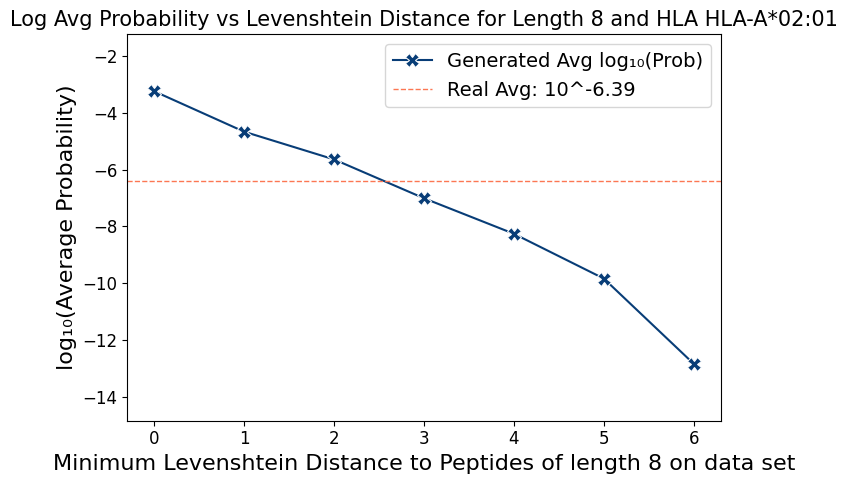

In [12]:
plot_probability_by_length(df_plot, 8, avg_real_prob_by_length, hla)

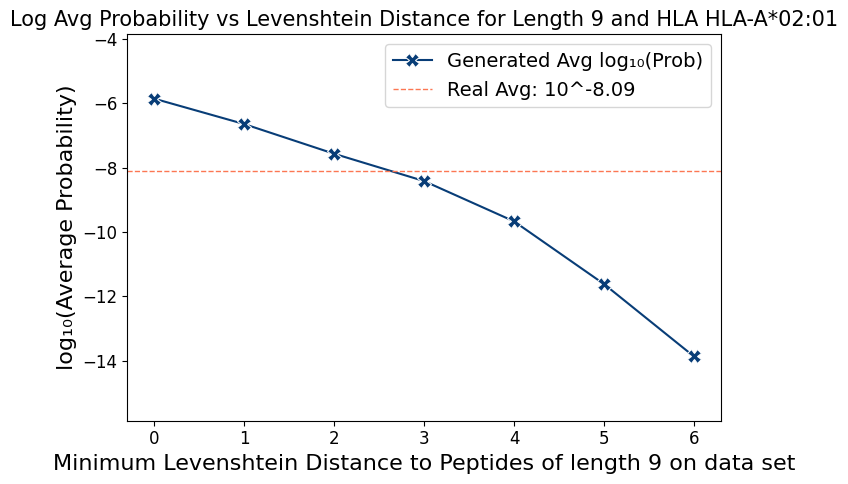

In [13]:
plot_probability_by_length(df_plot, 9, avg_real_prob_by_length, hla)
#box plot, with a line connecting the averages
#log of probability 

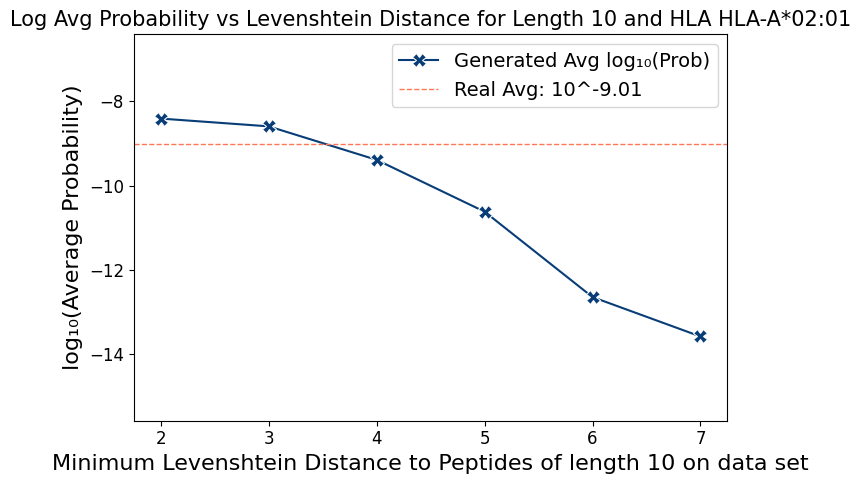

In [14]:
plot_probability_by_length(df_plot, 10, avg_real_prob_by_length, hla)


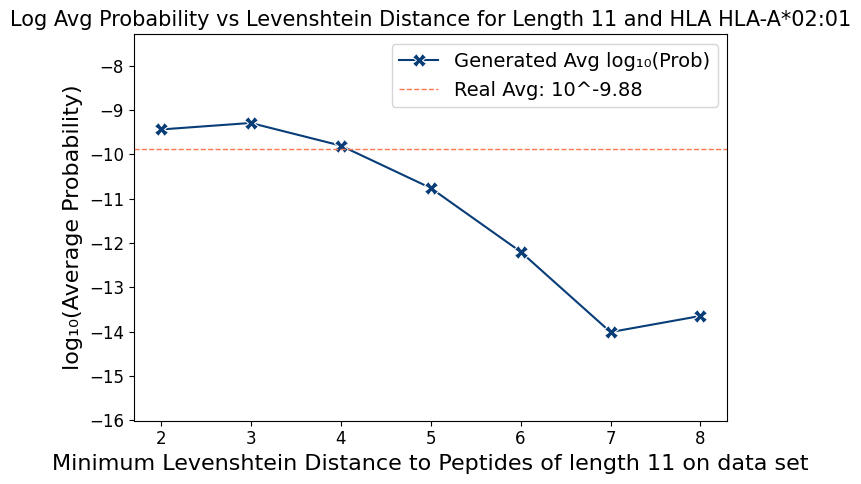

In [15]:
plot_probability_by_length(df_plot, 11, avg_real_prob_by_length, hla)


In [16]:
def scatter_probability_by_length(df_plot, length, avg_real_prob_by_length, hla, colours=None):
    if colours is None:
        colours = ["#083D77", "#9BC995", "#FC7753", "#9A031E"]
    
    df_len = df_plot[df_plot['Length'] == length].copy()
    df_len = df_len[df_len['Probability'] > 0]
    df_len['LogProbability'] = np.log10(df_len['Probability'])
    
    plt.figure(figsize=(8, 6))
    
    # Real peptides (distance 0)
    real_peptides = df_len[df_len['Levenshtein Distance'] == 0]
    # Generated peptides (distance > 0)
    gen_peptides = df_len[df_len['Levenshtein Distance'] > 0]
    
    if real_peptides.empty:
        print("Warning: No real peptides with Levenshtein Distance = 0 found for this length.")
    
    # Jitter x slightly to avoid overlap
    jitter = 0.05
    gen_x = gen_peptides['Levenshtein Distance'] + np.random.uniform(-jitter, jitter, size=len(gen_peptides))
    real_x = real_peptides['Levenshtein Distance'] + np.random.uniform(-jitter, jitter, size=len(real_peptides))
    
    
    plt.scatter(
        gen_x,
        gen_peptides['LogProbability'],
        color=colours[1],
        s=30,
        alpha=0.6,
        linewidth=0.3,
        label='Generated Peptides'
    )
    
    plt.scatter(
        real_x,
        real_peptides['LogProbability'],
        color=colours[2],
        s=60,
        alpha=0.1,
        linewidth=0.3,
        label='Real Peptides (Distance=0)'
    )
    
    avg_real = avg_real_prob_by_length.get(length)
    if avg_real is not None and avg_real > 0:
        plt.axhline(
            y=np.log10(avg_real),
            color='red',
            linestyle='--',
            linewidth=1.5,
            label=f'Real Avg log₁₀(Prob): {np.log10(avg_real):.2f}'
        )
    
    plt.title(f'Peptide Probabilities by Levenshtein Distance\nLength={length}, HLA={hla}', fontsize=15)
    plt.xlabel('Levenshtein Distance')
    plt.ylabel('log₁₀(Peptide Probability)')
    plt.xlim(left=-0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


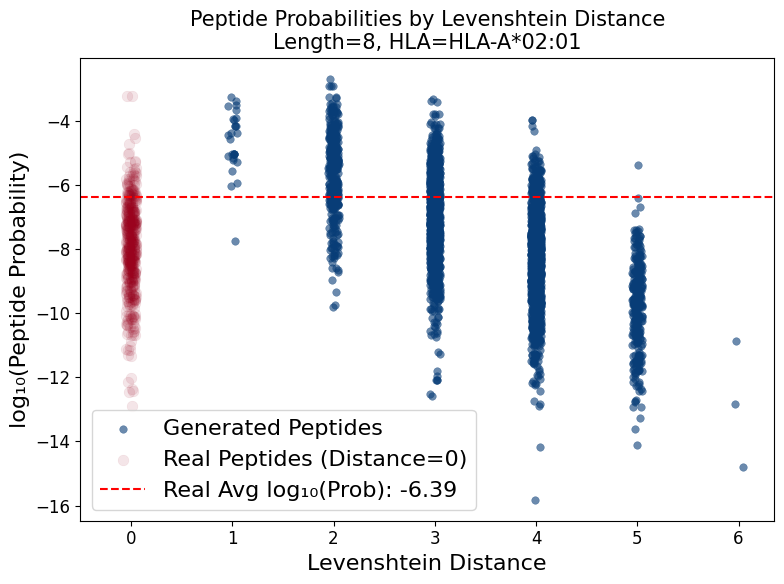

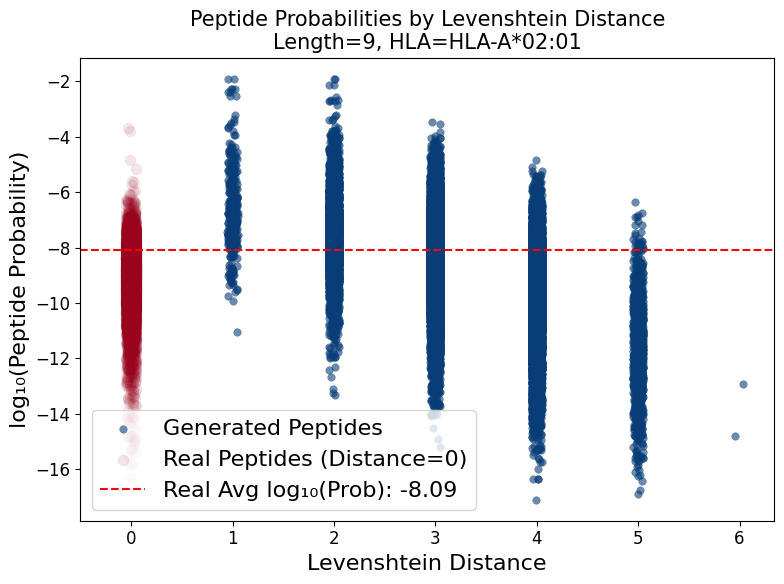

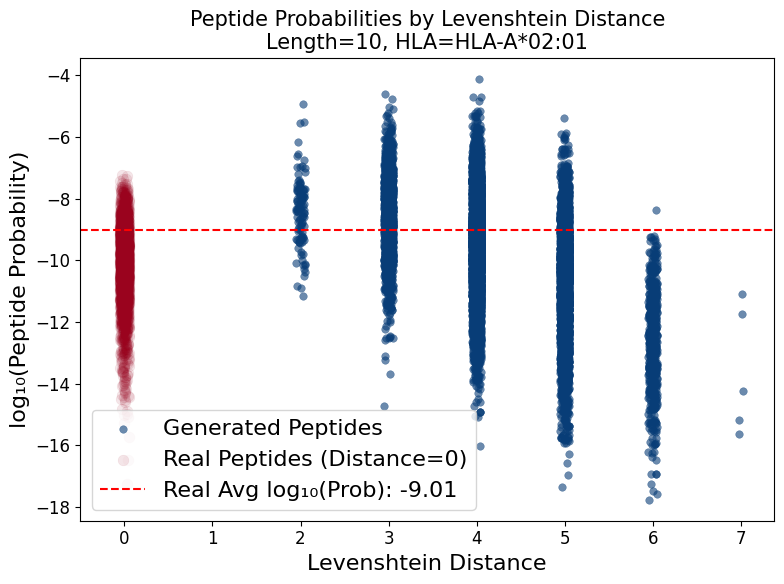

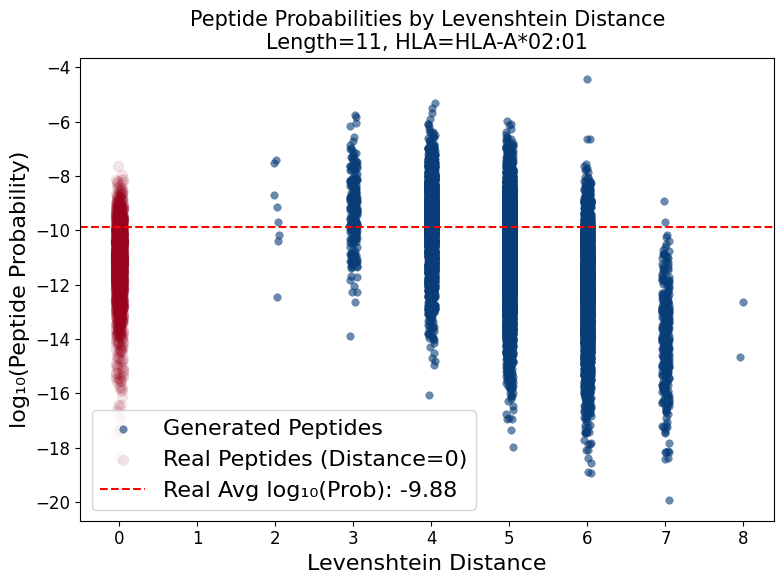

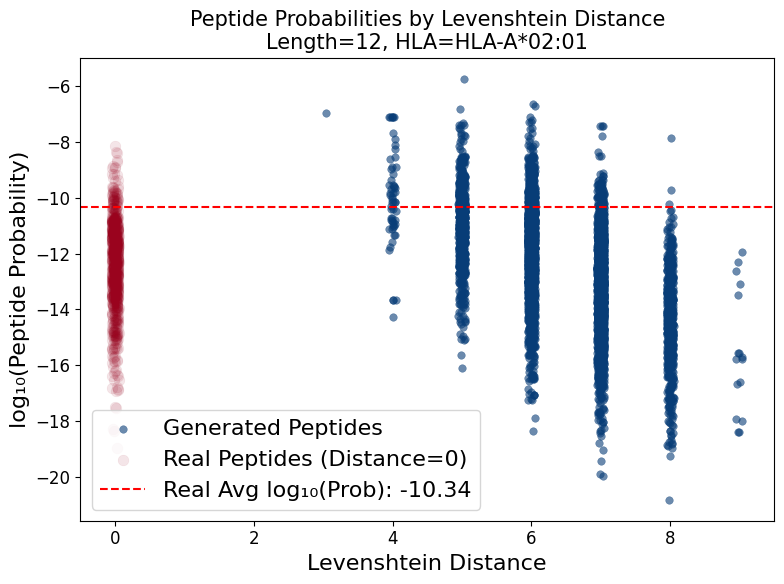

In [17]:
scatter_probability_by_length(df_plot_with_real, 8, avg_real_prob_by_length, hla, colours)
scatter_probability_by_length(df_plot_with_real, 9, avg_real_prob_by_length, hla, colours)
scatter_probability_by_length(df_plot_with_real, 10, avg_real_prob_by_length, hla, colours)
scatter_probability_by_length(df_plot_with_real, 11, avg_real_prob_by_length, hla, colours)
scatter_probability_by_length(df_plot_with_real, 12, avg_real_prob_by_length, hla, colours)

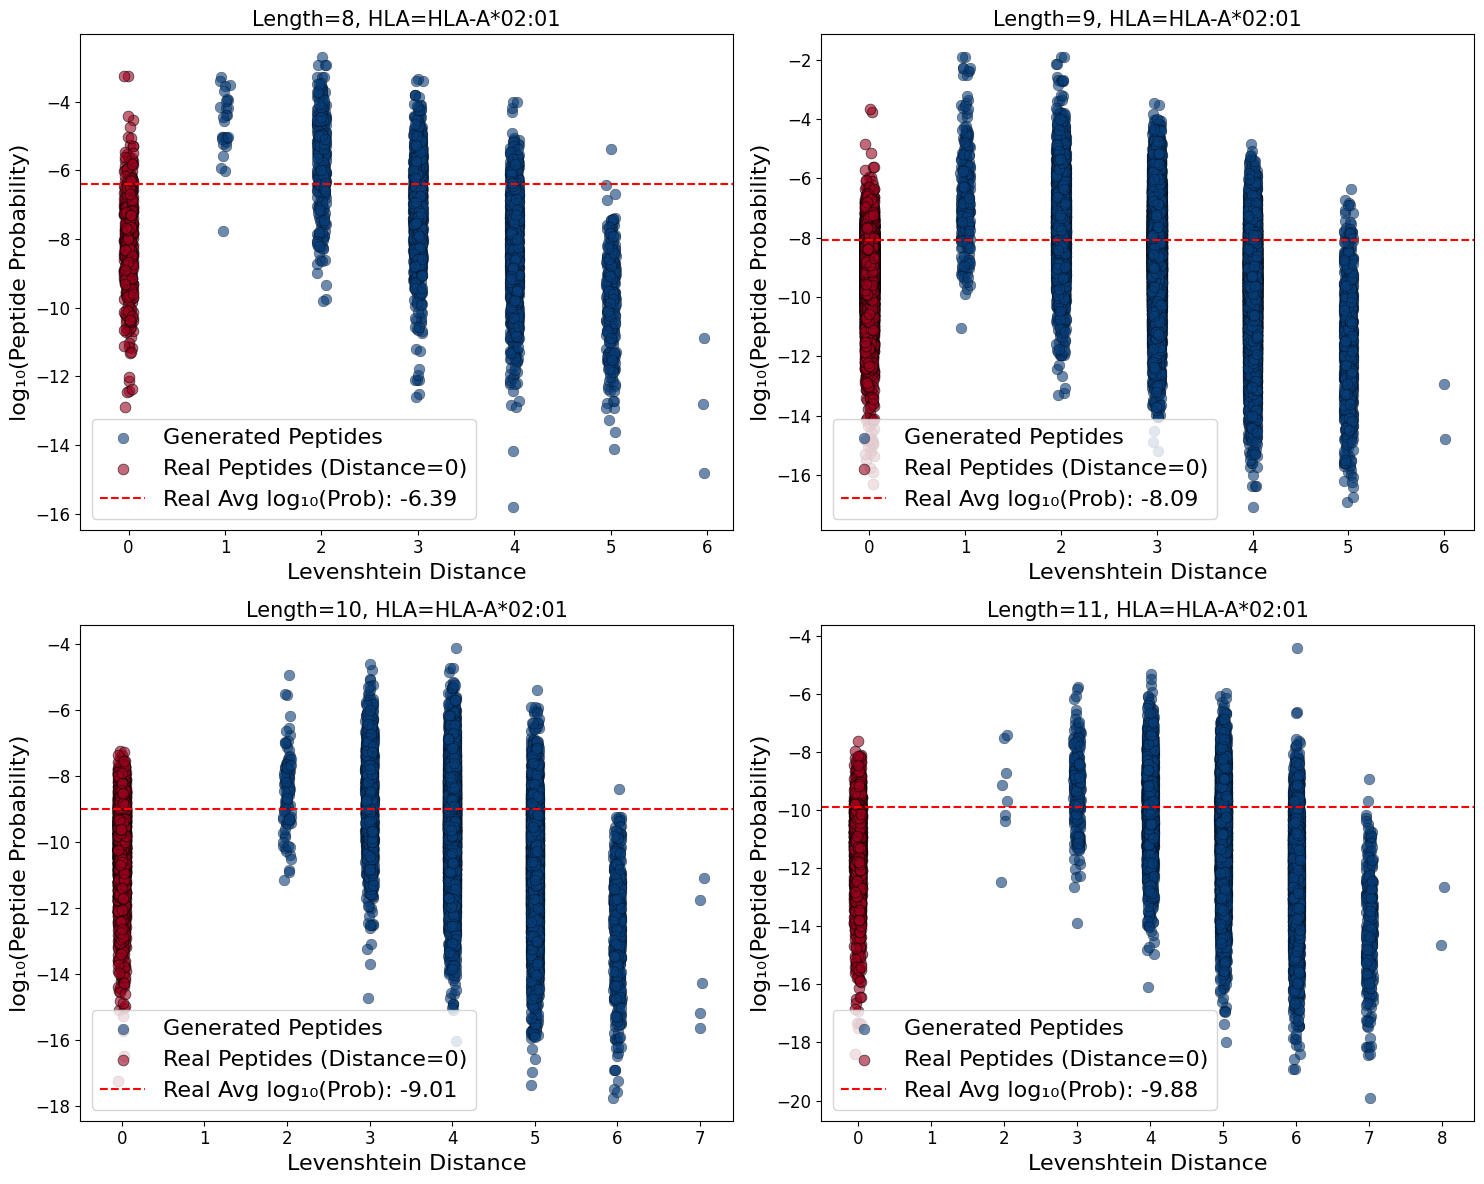

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def scatter_probability_subplots(df_plot, lengths, avg_real_prob_by_length, hla, colours=None):
    if colours is None:
        colours = ["#083D77", "#9BC995", "#FC7753", "#9A031E"]
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))  # no sharex, so all x axes show fully
    
    for i, length in enumerate(lengths):
        ax = axs[i // 2, i % 2]
        
        df_len = df_plot[df_plot['Length'] == length].copy()
        df_len = df_len[df_len['Probability'] > 0]
        df_len['LogProbability'] = np.log10(df_len['Probability'])
        
        real_peptides = df_len[df_len['Levenshtein Distance'] == 0]
        gen_peptides = df_len[df_len['Levenshtein Distance'] > 0]
        
        jitter = 0.05
        gen_x = gen_peptides['Levenshtein Distance'] + np.random.uniform(-jitter, jitter, size=len(gen_peptides))
        real_x = real_peptides['Levenshtein Distance'] + np.random.uniform(-jitter, jitter, size=len(real_peptides))
        
        ax.scatter(
            gen_x,
            gen_peptides['LogProbability'],
            color=colours[1],
            s=60,
            alpha=0.6,
            edgecolor='black',
            linewidth=0.3,
            label='Generated Peptides'
        )
        
        ax.scatter(
            real_x,
            real_peptides['LogProbability'],
            color=colours[2],
            s=60,
            alpha=0.6,
            edgecolor='black',
            linewidth=0.6,
            label='Real Peptides (Distance=0)'
        )
        
        avg_real = avg_real_prob_by_length.get(length)
        if avg_real is not None and avg_real > 0:
            ax.axhline(
                y=np.log10(avg_real),
                color='red',
                linestyle='--',
                linewidth=1.5,
                label=f'Real Avg log₁₀(Prob): {np.log10(avg_real):.2f}'
            )
        
        ax.set_title(f'Length={length}, HLA={hla}', fontsize=15)
        ax.set_xlabel('Levenshtein Distance')
        ax.set_ylabel('log₁₀(Peptide Probability)')
        ax.set_xlim(left=-0.5)
        ax.legend()

    
    plt.tight_layout()
    plt.show()

lengths = [8, 9, 10, 11]
scatter_probability_subplots(df_plot_with_real, lengths, avg_real_prob_by_length, hla, colours)


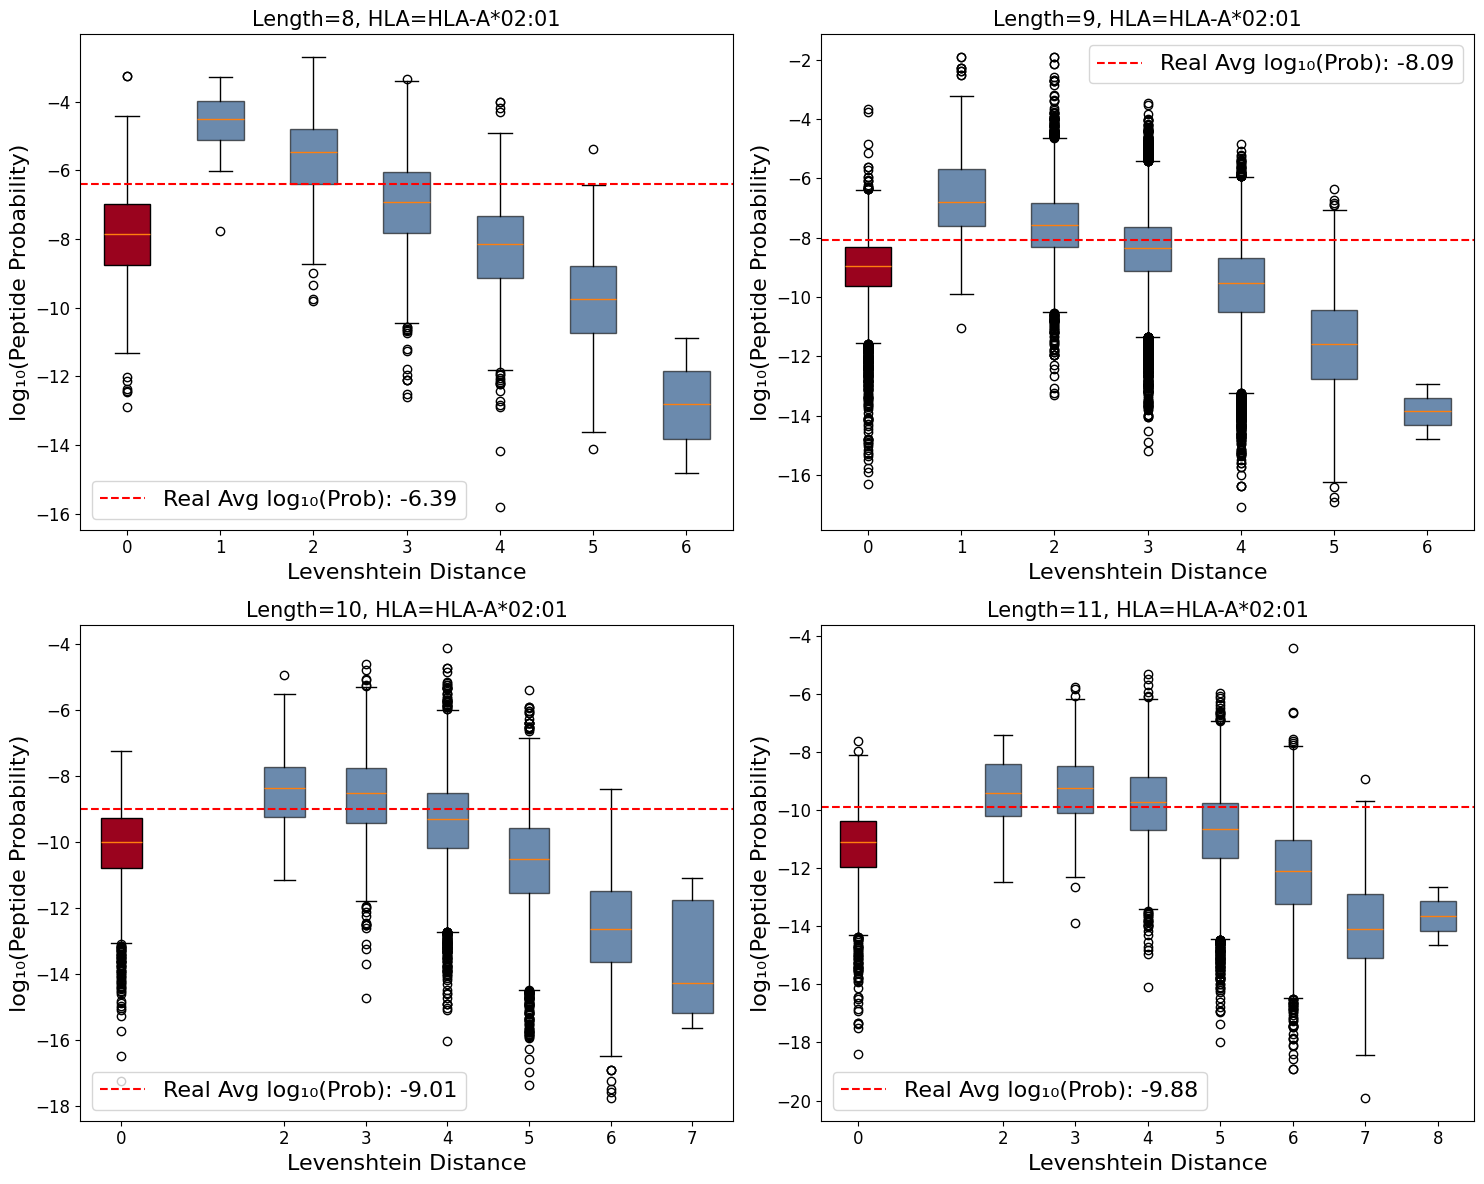

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def boxplot_probability_subplots(df_plot, lengths, avg_real_prob_by_length, hla, colours=None):
    if colours is None:
        colours = ["#083D77", "#9BC995", "#FC7753", "#9A031E"]
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))  # no sharex for full x-axis
    
    for i, length in enumerate(lengths):
        ax = axs[i // 2, i % 2]
        
        df_len = df_plot[df_plot['Length'] == length].copy()
        df_len = df_len[df_len['Probability'] > 0]
        df_len['LogProbability'] = np.log10(df_len['Probability'])
        
        # Group data by Levenshtein Distance for boxplot
        groups = df_len.groupby('Levenshtein Distance')['LogProbability'].apply(list)
        distances = sorted(groups.index)
        data = [groups[dist] for dist in distances]
        
        # Boxplot
        bp = ax.boxplot(data, positions=distances, patch_artist=True)
        
        # Color boxes: use gen color for distance > 0, real color for distance = 0
        for patch, dist in zip(bp['boxes'], distances):
            if dist == 0:
                patch.set_facecolor(colours[2])  # real peptides color
                patch.set_alpha(1.0)
            else:
                patch.set_facecolor(colours[1])  # generated peptides color
                patch.set_alpha(0.6)
        
        # Average real peptide prob line if exists
        avg_real = avg_real_prob_by_length.get(length)
        if avg_real is not None and avg_real > 0:
            ax.axhline(
                y=np.log10(avg_real),
                color='red',
                linestyle='--',
                linewidth=1.5,
                label=f'Real Avg log₁₀(Prob): {np.log10(avg_real):.2f}'
            )
        
        ax.set_title(f'Length={length}, HLA={hla}', fontsize=15)
        ax.set_xlabel('Levenshtein Distance')
        ax.set_ylabel('log₁₀(Peptide Probability)')
        ax.set_xlim(left=-0.5, right=max(distances) + 0.5)
        ax.legend()
    
    plt.tight_layout()
    plt.show()

boxplot_probability_subplots(df_plot_with_real, lengths, avg_real_prob_by_length, hla, colours)